In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Homework 5

This homework is based on the data from the ThinkStats book.
We are looking at live births only and want to compare the relationship `totalwgt_lb ~ agepreg` between first born babies and others.


1. For the first born babies: Estimate a linear regression, modeling weight of the baby as a function of the mothers' age: .
    * Compute a $95 \%$ confidence interval for the slope.
    * Compute the RSS.
    * Predict the birth weight for a baby whose mothers' age is $30$.
    
2. Repeat the tasks above for the "others" (not-first born) and discuss the difference.

In [2]:
%run ../ourFunctions.py

In [3]:
#pregnancy data:
#preg=pd.read_hdf('../data/pregNSFG.h5', 'df')
preg = pd.read_csv("../data/pregNSFG.csv.gz")

#only look at live births
live = preg[preg.outcome == 1]
live.head()

,Unnamed: 0,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


## 1 First born babies

In [4]:
live_first = live[live["pregordr"]==1]

### EDA

<AxesSubplot:xlabel='agepreg', ylabel='totalwgt_lb'>

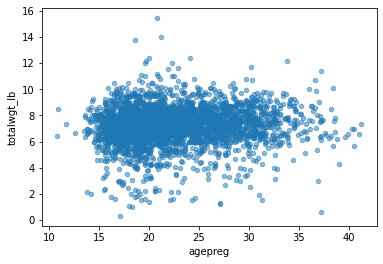

In [5]:
live_first[["totalwgt_lb","agepreg"]].plot(x="agepreg", y="totalwgt_lb", kind="scatter", alpha=0.5)

<AxesSubplot:xlabel='agepreg', ylabel='totalwgt_lb'>

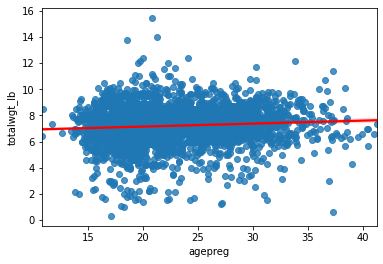

In [6]:
sns.regplot(x="agepreg", y="totalwgt_lb", data=live_first, line_kws={"color": "red"})

### Compute linear model

In [7]:
est_first = smf.ols('totalwgt_lb ~ agepreg', live_first).fit() #  y ~ x 
est_first.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.6906,0.111,60.299,0.000,6.473,6.908
agepreg,0.0229,0.005,4.745,0.000,0.013,0.032


In [8]:
conf_inv_first = est_first.conf_int().loc["agepreg",:]
conf_inv_first

0    0.013412
1    0.032304
Name: agepreg, dtype: float64

In [9]:
# RSS with regression coefficients
rss_first = np.sum((live_first.totalwgt_lb - (est_first.params[0] + est_first.params[1]*live_first.agepreg))**2)
rss_first

6600.748661731641

## "Others" (not-first born)

In [10]:
live_others = live[live["pregordr"]!=1]

### EDA

<AxesSubplot:xlabel='agepreg', ylabel='totalwgt_lb'>

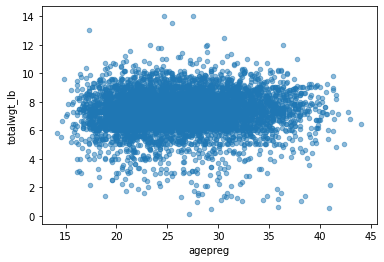

In [11]:
live_others[["totalwgt_lb","agepreg"]].plot(x="agepreg", y="totalwgt_lb", kind="scatter", alpha=0.5)

<AxesSubplot:xlabel='agepreg', ylabel='totalwgt_lb'>

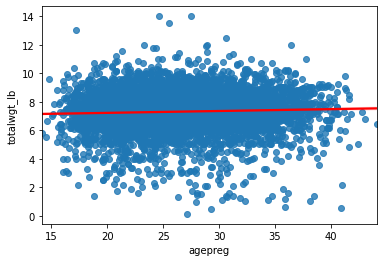

In [12]:
sns.regplot(x="agepreg", y="totalwgt_lb", data=live_others, line_kws={"color": "red"})

### Compute linear model

In [13]:
est_others = smf.ols('totalwgt_lb ~ agepreg', live_others).fit() #  y ~ x 
est_others.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.9560,0.094,74.008,0.000,6.772,7.140
agepreg,0.0131,0.003,3.749,0.000,0.006,0.020


In [14]:
conf_inv_others = est_others.conf_int().loc["agepreg",:]
conf_inv_others

0    0.006248
1    0.019946
Name: agepreg, dtype: float64

In [15]:
# RSS with regression coefficients
rss_others = np.sum((live_others.totalwgt_lb - (est_others.params[0] + est_others.params[1]*live_others.agepreg))**2)
rss_others

11229.990483137688

## Conclusion

- The model for first born babies does describe the sample data more accurately, because the variance within the data is smaller than the for the "others" 